In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.signal import butter,welch
import scipy

In [2]:
df = pd.read_csv('/home/devin/Documents/Galvanize/repos/Human-activity-recognition-using-smartphone-data/data/merged_data.csv')

In [3]:
df.head()

,Unnamed: 0,X,Y,Z,label,gyroX,gyroY,gyroZ,user
0,0,0.918056,-0.112500,0.509722,0,-0.054978,-0.069639,-0.030849,0.0
1,1,0.911111,-0.093056,0.537500,0,-0.012523,0.019242,-0.038485,0.0
2,2,0.881944,-0.086111,0.513889,0,-0.023518,0.276417,0.006414,0.0
3,3,0.881944,-0.086111,0.513889,0,-0.093462,0.367741,0.001222,0.0
4,4,0.879167,-0.100000,0.505556,0,-0.124311,0.476780,-0.022907,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1122772 entries, 0 to 1122771
Data columns (total 9 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   Unnamed: 0  1122772 non-null  int64  
 1   X           1122772 non-null  float64
 2   Y           1122772 non-null  float64
 3   Z           1122772 non-null  float64
 4   label       1122772 non-null  int64  
 5   gyroX       1122772 non-null  float64
 6   gyroY       1122772 non-null  float64
 7   gyroZ       1122772 non-null  float64
 8   user        1122772 non-null  float64
dtypes: float64(7), int64(2)
memory usage: 77.1 MB


In [20]:
df_walk = df[df['label'] == 1].reset_index()
df_up = df[df['label']== 2]
df_down = df[df['label'] == 3]
df_sit = df[df['label'] == 4]
df_standing = df[df['label'] == 5]
df_lay = df[df['label'] == 6].reset_index()

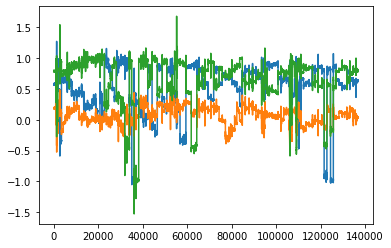

In [27]:
df_lay['Z'].plot()
df_lay['X'].plot()
df_lay['Y'].plot()

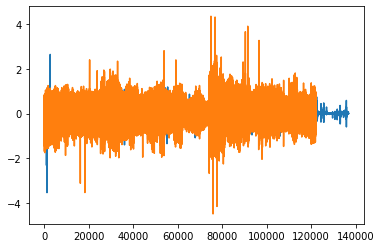

In [29]:
df_lay['gyroX'].plot()
df_walk['gyroX'].plot()

In [26]:
df_lay.head()

,index,Unnamed: 0,X,Y,Z,label,gyroX,gyroY,gyroZ,user
0,3661,3661,0.183333,0.784722,0.568056,6,-0.032070,-0.034514,0.000611,1.0
1,3662,3662,0.188889,0.783333,0.581944,6,-0.013134,-0.028405,-0.002138,1.0
2,3663,3663,0.197222,0.780556,0.577778,6,-0.021075,-0.001527,-0.003360,1.0
3,3664,3664,0.195833,0.776389,0.581944,6,-0.009163,0.006720,0.000305,1.0
4,3665,3665,0.184722,0.775000,0.568056,6,0.005192,0.000611,-0.007330,1.0


In [7]:
def compute_fft(data, dt=.02):
    
    n = len(data)
    fhat = np.fft.fft(data,n)
    PSD = fhat* np.conj(fhat)/n
    freq = (1/(dt*n))*np.arange(n)
    L = np.arange(1,np.floor(n/2),dtype='int')
    return PSD, freq, L

In [8]:
def butter_highpass(signal,highcut=.5, fs=50, order=2):
    nyq = 0.5 * fs
    high = highcut / nyq
    b, a = butter(order, high, btype="highpass")
    y = scipy.signal.filtfilt(b,a,signal,axis=0)
    return(y)


       index         Z
0          0 -0.118056
1          1 -0.245833
2          2 -0.125000
3          3 -0.027778
4          4 -0.044444
...      ...       ...
12395  12395  0.043056
12396  12396  0.077778
12397  12397  0.058333
12398  12398  0.036111
12399  12399  0.041667

[12400 rows x 2 columns]


(0, 100)

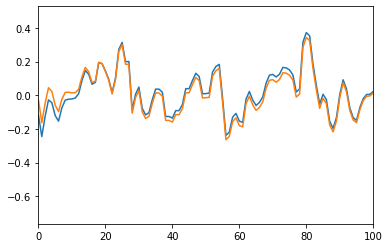

In [9]:
data_walk = df_walk['Z'].copy()
# data_walk.reset_index()
data = butter_highpass(data_walk.iloc[7600:20000])
plot_data = data_walk
raw_data = data_walk.iloc[7600:20000].reset_index()['Z']
print(raw_data.reset_index())
# data_walk = pd.DataFrame(data_walk)
# data_walk['filtered'] = data
data_walk.head()
fig,ax = plt.subplots()
# ax.plot(data_walk)
ax.plot(raw_data)
ax.plot(data)
plt.xlim(0,100)
# ax.plot(data[0:100])

/home/devin/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/devin/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/devin/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/devin/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/devin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  del sys.

(0.5731095864540385, 50)

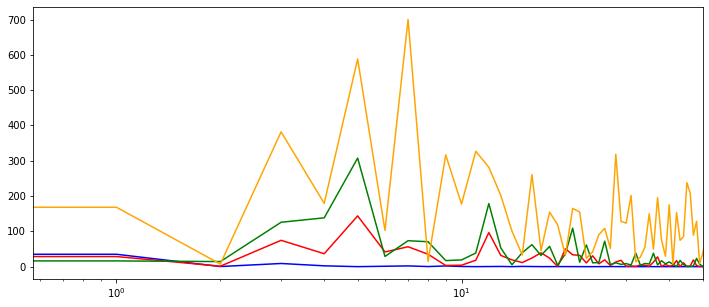

In [12]:
PSD, freq, L = compute_fft(data,dt=.02)
PSD2, freq2,L2 = compute_fft(raw_data,dt=.02)
psd_down, freq_down,l_down = compute_fft(df_down['Z'], dt=.02)
psd_up, freq_up,l_up = compute_fft(df_up['Z'], dt=.02)
psd_lay, freq_lay,l_lay = compute_fft(df_lay['Z'], dt=.02)
fig, ax = plt.subplots(figsize=(12,5))
# ax.plot(freq[L], PSD[L],color='red',alpha=.5)
ax.semilogx(PSD2[L2],color='blue')
ax.semilogx(psd_down[l_down],color='red')
ax.semilogx(psd_up[l_up],color='green')
ax.semilogx(psd_lay[l_lay],color='orange')
# ax.plot(PSD2[L2],color='blue',alpha=.5)
plt.xlim(0,50)

/home/devin/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(0, 2.5)

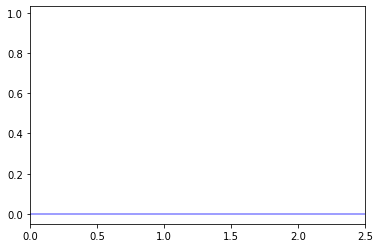

In [42]:
data_walk = df_walk['Z'].copy()
data_walk['filtered'] = data
data_up = df_up['Z'].copy()
dt = 0.02
# PSD, freq, L = compute_fft(data_up,dt)
PSD2, freq2,L2 = compute_fft(data_walk['filtered'],dt)

fig, ax = plt.subplots()
# ax.plot(freq[L], PSD[L],color='red',alpha=.5)
ax.plot(PSD2[L2],color='blue',alpha=.5)

plt.xlim(0,2.5)
# # ax[1].plot(freq2[L2], PSD2[L2])
# # plt.xlim(freq[L[0]],freq[L[-1]])
# plt.show()

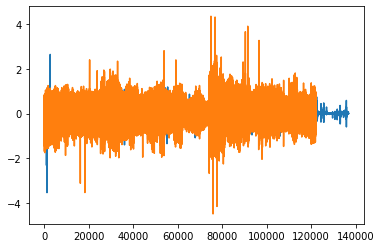

In [30]:
df_lay['gyroX'].plot()
df_walk['gyroX'].plot()

In [ ]:
PSD, freq, L = compute_fft(data,dt=.02)
PSD2, freq2,L2 = compute_fft(raw_data,dt=.02)
psd_down, freq_down,l_down = compute_fft(df_down['Z'], dt=.02)
psd_up, freq_up,l_up = compute_fft(df_up['Z'], dt=.02)
psd_lay, freq_lay,l_lay = compute_fft(df_lay['Z'], dt=.02)
fig, ax = plt.subplots(figsize=(12,5))
# ax.plot(freq[L], PSD[L],color='red',alpha=.5)
ax.semilogx(PSD2[L2],color='blue')
ax.semilogx(psd_down[l_down],color='red')
ax.semilogx(psd_up[l_up],color='green')
ax.semilogx(psd_lay[l_lay],color='orange')
# ax.plot(PSD2[L2],color='blue',alpha=.5)
plt.xlim(0,50)

In [53]:
# f,power = welch(butter_highpass(df_walk['Z']),fs=50)
f,power = welch(data,fs=50,scaling='spectrum',average='median')
f2,power2 = welch(butter_highpass(df_up['Z']),fs=50,average='median')
f3,power3 = welch(butter_highpass(df_lay['Z']),fs=50,average='median')
f4,power4 = welch(butter_highpass(df_down['Z']),fs=50,average='median')

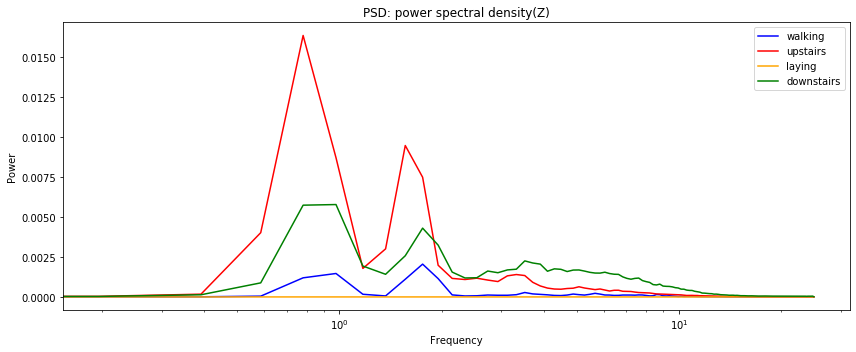

In [54]:
plt.figure(figsize=(12, 5))
plt.semilogx(f, power,color='blue',label='walking')
plt.semilogx(f2, power2,color='red',label='upstairs')
plt.semilogx(f3,power3,color='orange',label='laying')
plt.semilogx(f4,power4,color='green',label='downstairs')
plt.title('PSD: power spectral density(Z)')
plt.legend()
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.tight_layout()

In [55]:
f,power = welch(butter_highpass(df_walk['X']),fs=50)
f2,power2 = welch(butter_highpass(df_up['X']),fs=50)
f3,power3 = welch(butter_highpass(df_lay['X']),fs=50)
f4,power4 = welch(butter_highpass(df_down['X']),fs=50)

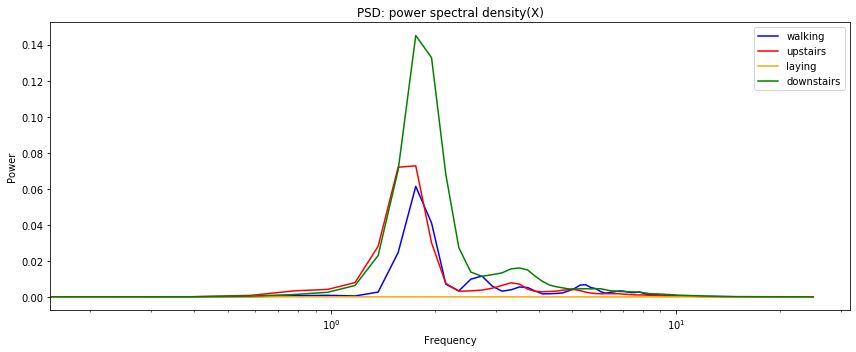

In [56]:
plt.figure(figsize=(12,5))
plt.semilogx(f, power,color='blue',label='walking')
plt.semilogx(f2, power2,color='red',label='upstairs')
plt.semilogx(f3,power3,color='orange',label='laying')
plt.semilogx(f4,power4,color='green',label='downstairs')
plt.title('PSD: power spectral density(X)')
plt.legend()
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.tight_layout()

In [57]:
f,power = welch(butter_highpass(df_walk['Y']),fs=50)
f2,power2 = welch(butter_highpass(df_up['Y']),fs=50)
f3,power3 = welch(butter_highpass(df_lay['Y']),fs=50)
f4,power4 = welch(butter_highpass(df_down['Y']),fs=50)

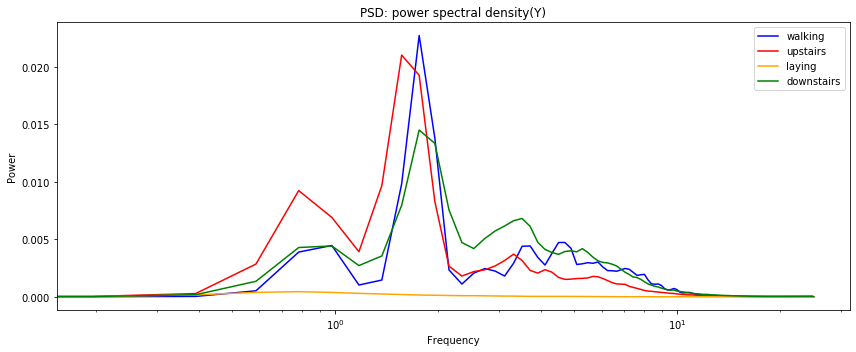

In [60]:
plt.figure(figsize=(12,5))
plt.semilogx(f, power,color='blue',label='walking')
plt.semilogx(f2, power2,color='red',label='upstairs')
plt.semilogx(f3,power3,color='orange',label='laying')
plt.semilogx(f4,power4,color='green',label='downstairs')
plt.title('PSD: power spectral density(Y)' )
plt.legend()
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.tight_layout()